In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import csv
import sys

In [10]:
# load datasets
dataset_2014 = pd.read_csv('datasets/Crime_Data_2014.csv')
dataset_2014.sort_values(by='ID')

/home/iman/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
257,80-14-057405,2014-08-02 05:28:16,2014-08-02 01:44:16,UNLAWFUL ACCESS TO COMPUTER-1ST DEGREE,OTHER,90Z,PART II,COMPLETED,3RD DIVISION,331,DEPARTMENT / DISCOUNT STORE,6800 BLOCK DIXIE HWY ...,LOUISVILLE,40258.0,40513
258,80-14-014861,2014-03-02 13:26:03,2014-02-22 08:00:00,"RECEIVING STOLEN PROPERTY U/$10,000",THEFT/LARCENY,280,PART II,COMPLETED,8TH DIVISION,815,OTHER / UNKNOWN,8000 BLOCK NEW LA GRANGE RD ...,LOUISVILLE,40222.0,41118
0,80-14-048074,2014-06-30 10:46:00,2014-06-29 21:00:00,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,4TH DIVISION,424,HIGHWAY / ROAD / ALLEY,2900 BLOCK S 3RD ST ...,LOUISVILLE,40208.0,52593
28,80-14-087609,2014-11-12 11:47:00,2014-11-07 14:50:00,WANTON ENDANGERMENT-1ST DEGREE-POLICE OFFICER,ASSAULT,13A,PART I,COMPLETED,7TH DIVISION,723,HIGHWAY / ROAD / ALLEY,5800 BLOCK FEGENBUSH LN ...,LOUISVILLE,40225.0,66222
29,80-14-092162,2014-12-03 11:21:00,2014-11-30 01:07:00,DRUG PARAPHERNALIA - BUY/POSSESS,DRUGS/ALCOHOL VIOLATIONS,35B,PART II,COMPLETED,8TH DIVISION,824,HIGHWAY / ROAD / ALLEY,9800 BLOCK FOREST VILLAGE LN ...,LOUISVILLE,40223.0,66280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77459,80-14-003757,2014-01-15 19:13:00,2014-01-15 19:00:00,BURGLARY - 1ST DEGREE,BURGLARY,220,PART I,COMPLETED,7TH DIVISION,723,RESIDENCE / HOME,6600 BLOCK OUTER LOOP ...,LOUISVILLE,40228,1287846
77460,80-14-050310,2014-07-08 09:29:00,2014-07-08 07:05:00,BURGLARY - 1ST DEGREE,BURGLARY,220,PART I,COMPLETED,7TH DIVISION,724,OTHER / UNKNOWN,6200 BLOCK HACKBERRY WAY ...,LOUISVILLE,40229,1287848
77461,80-14-098716,2014-12-23 05:03:00,2014-12-22 21:00:00,"TBUT OR DISP ALL OTHERS > $500 BUT < $10,000",THEFT/LARCENY,23H,PART I,COMPLETED,1ST DIVISION,112,RESIDENCE / HOME,600 BLOCK S 20TH ST ...,LOUISVILLE,40203,1290945
77462,80-14-006480,2014-01-26 21:12:18,2014-01-10 20:00:00,ANY NON CRIMINAL CHARGE NOT COVERED BY THESE C...,OTHER,90Z,PART II,ATTEMPTED,1ST DIVISION,112,HIGHWAY / ROAD / ALLEY,S 27TH ST / W MADISON ST ...,LOUISVILLE,40211,1290952


In [57]:
dataset_2015 = pd.read_csv('datasets/Crime_Data_2015.csv')
dataset_2015.sort_values(by='ID')

/home/iman/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
202,80-15-004881,2015-01-20 07:16:00,2015-01-19 19:15:00,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,5TH DIVISION,525,OTHER / UNKNOWN,200 BLOCK DON ALLEN RD ...,RICHLAWN,40207,345
203,80-15-071876,2015-09-09 10:29:00,2015-08-24 00:00:00,SODOMY - 1ST DEGREE - VICTIM U/12 YEARS OF AGE,SEX CRIMES,11B,PART I,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,900 BLOCK S CLAY ST ...,LOUISVILLE,40203,1663
29,80-15-005304,2015-01-21 12:03:00,2015-01-21 02:00:00,SODOMY - 1ST DEGREE W/SERIOUS PHYSICAL INJURY,SEX CRIMES,11B,PART I,COMPLETED,1ST DIVISION,135,RESIDENCE / HOME,400 BLOCK E MUHAMMAD ALI BLVD ...,LOUISVILLE,40202,13176
30,80-15-046754,2015-06-19 02:56:15,2015-06-19 02:56:15,"TBUT OR DISP FROM BLDG $500 OR > BUT < $10,000",THEFT/LARCENY,23D,PART I,COMPLETED,7TH DIVISION,723,DEPARTMENT / DISCOUNT STORE,7100 BLOCK CEDAR SPRINGS BLVD ...,LOUISVILLE,40291,14331
0,80-15-095254,2015-11-23 08:30:00,2015-11-22 23:00:00,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,7TH DIVISION,712,OTHER RESIDENCE (APARTMENT/CONDO),10500 BLOCK GLENMARY FARM DR ...,LOUISVILLE,40291,26544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78786,80-15-049825,2015-06-29 11:21:00,2015-05-01 00:00:00,SEXUAL ABUSE - 1ST DEGREE- VICTIM U/12 YOA,SEX CRIMES,11D,PART II,COMPLETED,7TH DIVISION,724,RESIDENCE / HOME,5900 BLOCK CARMELWOOD DR ...,LOUISVILLE,40229.0,1313080
78787,80-15-080120,2015-10-05 21:45:00,2015-10-05 21:00:00,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,7TH DIVISION,711,OTHER RESIDENCE (APARTMENT/CONDO),5400 BLOCK GOVERNOURS WAY ...,LOUISVILLE,40291.0,1315118
78788,80-15-017272,2015-03-10 21:59:00,2015-03-10 12:30:00,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,4TH DIVISION,435,HIGHWAY / ROAD / ALLEY,4300 BLOCK RONDEAN DR ...,LOUISVILLE,40216.0,1316239
78789,80-15-012884,2015-02-20 23:04:47,2015-02-20 19:32:47,RECEIVING STOLEN PROPERTY U/$500 MISD,THEFT/LARCENY,280,PART II,COMPLETED,8TH DIVISION,815,PARKING LOT / GARAGE,7900 BLOCK SHELBYVILLE RD ...,LOUISVILLE,40222.0,1317560


In [58]:
dataset_2016 = pd.read_csv('datasets/Crime_Data_2016.csv')
dataset_2016.sort_values(by='ID')

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
227,80-16-000860,2016-01-01 03:41:00,2016-01-01 02:00:00,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,6TH DIVISION,624,RESIDENCE / HOME,4200 BLOCK LAMBERT AVE ...,LOUISVILLE,40218.0,981776
228,80-16-000891,2016-01-01 08:55:00,2016-01-01 01:00:00,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,3RD DIVISION,323,RESIDENCE / HOME,7400 BLOCK OLD NORTH CHURCH RD ...,LOUISVILLE,40214.0,981777
229,80-16-001017,2016-01-01 18:20:00,2015-12-31 09:30:00,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,2ND DIVISION,211,RESIDENCE / HOME,100 BLOCK LONGWORTH AVE ...,LOUISVILLE,40210.0,981778
230,80-16-001031,2016-01-01 19:33:00,2016-01-01 17:45:00,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,6100 BLOCK PAGES LN ...,LOUISVILLE,40258.0,981779
231,80-16-001070,2016-01-02 23:54:00,2016-01-01 22:00:00,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,3RD DIVISION,331,RESIDENCE / HOME,4800 BLOCK ROCKAWAY CIR ...,LOUISVILLE,40216.0,981780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83897,80-16-102688,2016-12-01 21:22:00,2016-12-01 18:30:00,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,1ST DIVISION,134,HIGHWAY / ROAD / ALLEY,100 BLOCK W MARKET ST ...,LOUISVILLE,40202.0,1235963
83898,80-16-072024,2016-08-23 05:53:00,2016-08-22 20:30:00,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,4TH DIVISION,435,HIGHWAY / ROAD / ALLEY,4400 BLOCK MALCOLM RD ...,LOUISVILLE,40216.0,1236293
83899,80-16-017812,2016-03-01 15:01:00,2016-03-01 15:01:00,JUSTIFIABLE HOMICIDE,HOMICIDE,09C,PART II,COMPLETED,2ND DIVISION,211,HIGHWAY / ROAD / ALLEY,600 BLOCK MADELON CT ...,LOUISVILLE,40211.0,1239050
83900,80-16-096975,2016-11-12 22:44:39,2016-11-12 13:22:39,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,4TH DIVISION,424,HIGHWAY / ROAD / ALLEY,600 BLOCK PHILLIPS LN ...,LOUISVILLE,40209.0,1239631


In [59]:
dataset_2017 = pd.read_csv('datasets/Crime_Data_2017.csv')
dataset_2017.sort_values(by='ID')

/home/iman/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
256,80-17-000104,2017-01-01 11:29:00,2016-12-31 19:00:00,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,6200 BLOCK BETHANY LN ...,LOUISVILLE,40272,1058287
257,80-17-000215,2017-01-01 20:08:00,2016-12-31 07:30:00,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,2ND DIVISION,211,RESIDENCE / HOME,600 BLOCK 36TH ST ...,LOUISVILLE,40211,1058288
258,80-17-000396,2017-01-02 13:35:00,2017-01-01 20:00:00,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,4TH DIVISION,423,RESIDENCE / HOME,1300 BLOCK WELLER AVE ...,LOUISVILLE,40208,1058289
259,80-17-000418,2017-01-02 14:26:00,2017-01-02 14:00:00,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,6TH DIVISION,624,RESIDENCE / HOME,5200 BLOCK BARDSTOWN RD ...,LOUISVILLE,40291,1058290
260,80-17-000520,2017-01-02 19:50:00,2017-01-02 17:03:00,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,1ST DIVISION,111,COMMUNITY CENTER,400 BLOCK BROADWAY ...,LOUISVILLE,40212,1058291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78332,80-17-069810,2017-08-28 19:48:22,2017-08-25 16:00:00,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,6TH DIVISION,624,HIGHWAY / ROAD / ALLEY,9000 BLOCK CATANIA DR ...,LOUISVILLE,40299.0,1239820
78333,80-17-032612,2017-04-25 00:16:00,2017-04-25 00:16:00,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,ASSAULT,13B,PART II,COMPLETED,8TH DIVISION,815,RESIDENCE / HOME,1300 BLOCK FALCONWOOD RD ...,LYNDON,40222.0,1240578
78334,80-17-087206,2017-10-25 17:53:00,2017-10-25 17:48:00,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,8TH DIVISION,811,PARKING LOT / GARAGE,4100 BLOCK HAMPTON LAKE WAY ...,LOUISVILLE,40241.0,1240685
78335,80-17-096367,2017-11-28 07:58:34,2017-11-28 02:59:34,"RECEIVING STOLEN PROPERTY U/$10,000",THEFT/LARCENY,280,PART II,COMPLETED,1ST DIVISION,112,HIGHWAY / ROAD / ALLEY,1900 BLOCK W JEFFERSON ST ...,LOUISVILLE,40203.0,1241091


In [60]:
dataset_2018 = pd.read_csv('datasets/Crime_Data_2018.csv')
dataset_2018.sort_values(by='ID')

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
58,80-18-044738,6/13/2018 8:10,6/13/2018 7:57,HARASSMENT - PHYSICAL CONTACT - NO INJURY,ASSAULT,13B,PART II,COMPLETED,4TH DIVISION,411,RESIDENCE / HOME,1000 BLOCK S 2ND ST ...,LOUISVILLE,40203.0,442535
59,80-18-048775,6/27/2018 13:59,6/27/2018 11:17,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) NO VI...,ASSAULT,13B,PART II,COMPLETED,7TH DIVISION,723,RESIDENCE / HOME,6900 BLOCK SANDSTONE BLVD ...,LOUISVILLE,40219.0,442536
60,80-18-049377,6/29/2018 23:16,6/28/2018 11:30,"TBUT OR DISP ALL OTHERS > $500 BUT < $10,000",THEFT/LARCENY,23H,PART I,COMPLETED,2ND DIVISION,212,RESIDENCE / HOME,3500 BLOCK GREENWOOD AVE ...,LOUISVILLE,40211.0,442537
61,80-18-044575,6/12/2018 14:34,6/12/2018 9:00,"TBUT OR DISP ALL OTHERS > $500 BUT < $10,000",THEFT/LARCENY,23H,PART I,COMPLETED,2ND DIVISION,211,OTHER / UNKNOWN,600 BLOCK S 43RD ST ...,LOUISVILLE,40211.0,442538
62,80-18-049375,6/29/2018 11:35,6/27/2018 19:00,CRIMINAL MISCHIEF - 1ST DEGREE,VANDALISM,290,PART II,COMPLETED,8TH DIVISION,812,SCHOOL - ELEMENTARY / SECONDARY,4100 BLOCK SPRINGDALE RD ...,LOUISVILLE,40241.0,442539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70335,80-18-000132,1/1/2018 15:08,1/1/2018 15:08,ASSAULT - 2ND DEGREE - DOMESTIC VIOLENCE,ASSAULT,13A,PART I,COMPLETED,6TH DIVISION,613,RESIDENCE / HOME,5400 BLOCK AILANTHUS TRL ...,LOUISVILLE,40219.0,1410998
70336,80-18-076901,10/1/2018 23:33,10/1/2018 23:20,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,6TH DIVISION,613,RESIDENCE / HOME,5300 BLOCK MANSFIELD CT ...,LOUISVILLE,40218.0,1418459
70337,80-18-033154,5/4/2018 21:26,3/15/2018 9:00,"TBUT OR DISP AUTO > $10,000 BUT < $1,000,000",MOTOR VEHICLE THEFT,240,PART I,COMPLETED,6TH DIVISION,624,OTHER / UNKNOWN,4100 BLOCK BARDSTOWN RD ...,LOUISVILLE,40218.0,1419371
70338,80-18-094281,12/3/2018 10:18,11/25/2018 0:00,CRIMINAL ABUSE-1ST DEGREE-CHILD 12 OR UNDER,ASSAULT,13A,PART I,COMPLETED,6TH DIVISION,613,RESIDENCE / HOME,5500 BLOCK REVERE DR ...,LOUISVILLE,40218.0,1420724


In [11]:
n = len(dataset_2014['DATE_OCCURED'])
for i in range(n):
    x = dataset_2014['DATE_OCCURED'][i]
    try:
        d = datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')
        ts = datetime.datetime.timestamp(d)
        dataset_2014['DATE_OCCURED'][i] = ts
    except ValueError as ve:
        print(x, ve)
        dataset_2014['DATE_OCCURED'][i] = -1

/tmp/ipykernel_347597/3427415943.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2014['DATE_OCCURED'][i] = ts


nan time data 'nan' does not match format '%Y-%m-%d %H:%M:%S'


/tmp/ipykernel_347597/3427415943.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2014['DATE_OCCURED'][i] = -1


nan time data 'nan' does not match format '%Y-%m-%d %H:%M:%S'
nan time data 'nan' does not match format '%Y-%m-%d %H:%M:%S'
nan time data 'nan' does not match format '%Y-%m-%d %H:%M:%S'


In [12]:
dataset_2014['DATE_OCCURED'][:n]

0        1404059400.0
1        1389870900.0
2        1406546640.0
3        1417192200.0
4        1417192200.0
             ...     
77461    1419269400.0
77462    1389371400.0
77463    1391016600.0
77464    1357014600.0
77465    1415392140.0
Name: DATE_OCCURED, Length: 77466, dtype: object

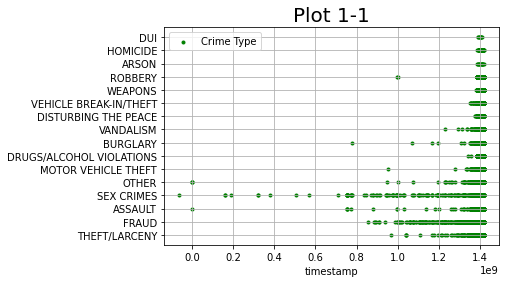

In [13]:
x = dataset_2014['DATE_OCCURED']
y = dataset_2014['CRIME_TYPE']

plt.scatter(x, y, color = 'g', marker = '.',label = "Crime Type")
  
plt.xlabel('timestamp')
plt.title('Plot 1-1', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

In [34]:
CRIME_TYPES = list(set(dataset_2014['CRIME_TYPE']))
print(CRIME_TYPES)

['DRUGS/ALCOHOL VIOLATIONS', 'ROBBERY', 'ASSAULT', 'FRAUD', 'OTHER', 'THEFT/LARCENY', 'MOTOR VEHICLE THEFT', 'ARSON', 'WEAPONS', 'DISTURBING THE PEACE', 'DUI', 'VANDALISM', 'VEHICLE BREAK-IN/THEFT', 'SEX CRIMES', 'HOMICIDE', 'BURGLARY']


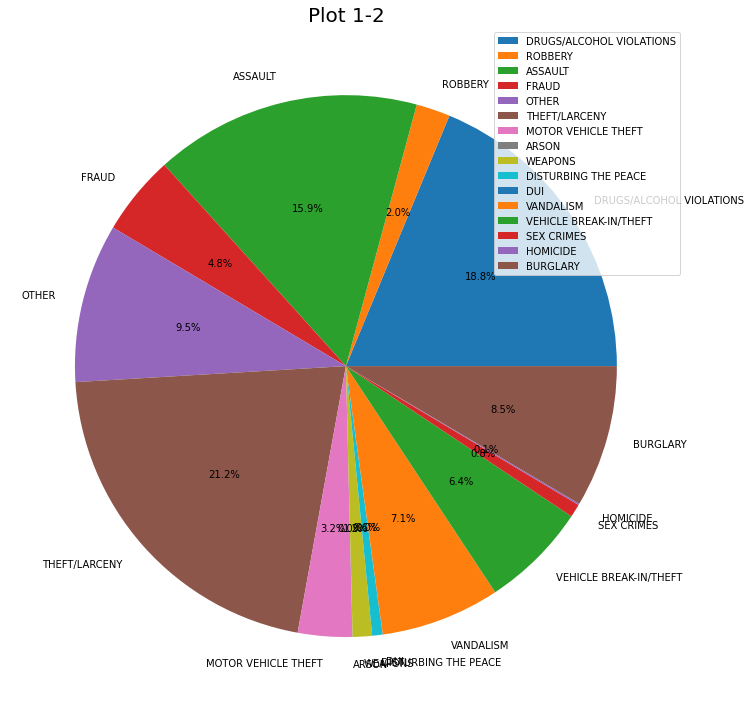

In [43]:
x = list(dataset_2014['CRIME_TYPE'])
occurances = [x.count(t) for t in CRIME_TYPES]

plt.pie(occurances, labels=CRIME_TYPES, autopct='%1.1f%%')
  
plt.title('Plot 1-2', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

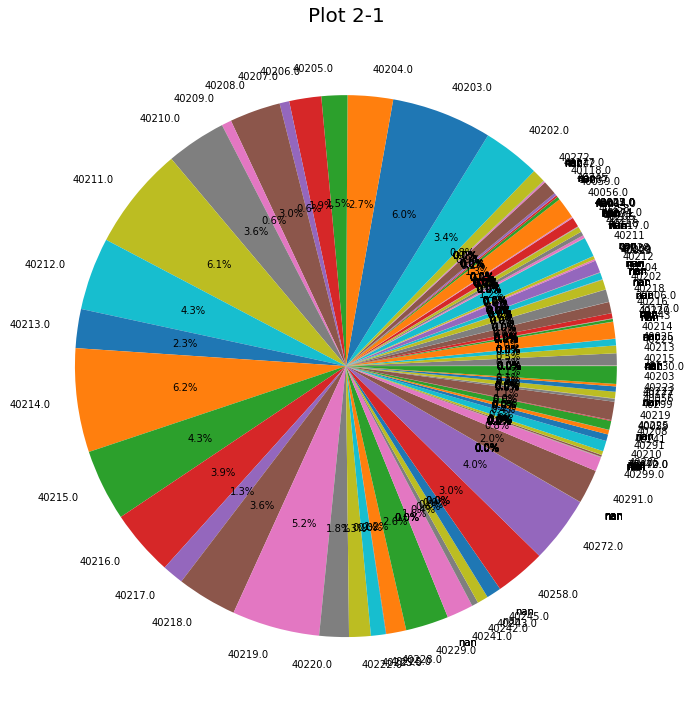

In [46]:
ZIP_CODES = list(set(dataset_2014['ZIP_CODE']))
x = list(dataset_2014['ZIP_CODE'])
occurances = [x.count(t) for t in ZIP_CODES]

plt.pie(occurances, labels=ZIP_CODES, autopct='%1.1f%%')
  
plt.title('Plot 2-1', fontsize = 20)
plt.grid()
plt.show()

In [47]:
n = len(dataset_2014['DATE_REPORTED'])
for i in range(n):
    x = dataset_2014['DATE_REPORTED'][i]
    try:
        d = datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')
        ts = datetime.datetime.timestamp(d)
        dataset_2014['DATE_REPORTED'][i] = ts
    except ValueError as ve:
        print(x, ve)
        dataset_2014['DATE_REPORTED'][i] = -1

/tmp/ipykernel_347597/1653987330.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2014['DATE_REPORTED'][i] = ts


In [53]:
latency = [float(y)-float(x) for x, y in zip(dataset_2014['DATE_OCCURED'], dataset_2014['DATE_REPORTED'])]

In [54]:
latency

[49560.0,
 12900.0,
 489257.0,
 355827.0,
 355827.0,
 986400.0,
 771600.0,
 752454.0,
 420.0,
 71100.0,
 1800.0,
 660.0,
 12180.0,
 80640.0,
 86400.0,
 360.0,
 2460.0,
 16963740.0,
 0.0,
 0.0,
 296510.0,
 17580.0,
 1560.0,
 166200.0,
 1860.0,
 11100.0,
 9600.0,
 35220.0,
 421020.0,
 296040.0,
 1680.0,
 1680.0,
 50040.0,
 296040.0,
 180.0,
 180.0,
 801146.0,
 10920.0,
 57000.0,
 1800.0,
 2100.0,
 6300.0,
 600.0,
 600.0,
 1020.0,
 39660.0,
 16560.0,
 10200.0,
 4620.0,
 4620.0,
 48720.0,
 432000.0,
 3900.0,
 9404340.0,
 172800.0,
 504660.0,
 88860.0,
 1871171.0,
 168000.0,
 576240.0,
 1380.0,
 168000.0,
 162900.0,
 3780.0,
 1260.0,
 2820.0,
 300.0,
 960.0,
 0.0,
 12960.0,
 99180.0,
 7291244.0,
 361249.0,
 0.0,
 0.0,
 0.0,
 778680.0,
 0.0,
 648351.0,
 232961.0,
 0.0,
 3060.0,
 0.0,
 0.0,
 2340.0,
 0.0,
 13440.0,
 0.0,
 0.0,
 1920.0,
 23264880.0,
 12600.0,
 4260.0,
 36982380.0,
 281400.0,
 0.0,
 420.0,
 24300.0,
 1020.0,
 660.0,
 360.0,
 17040.0,
 0.0,
 0.0,
 0.0,
 3420.0,
 3420.0,
 0.0,
 6

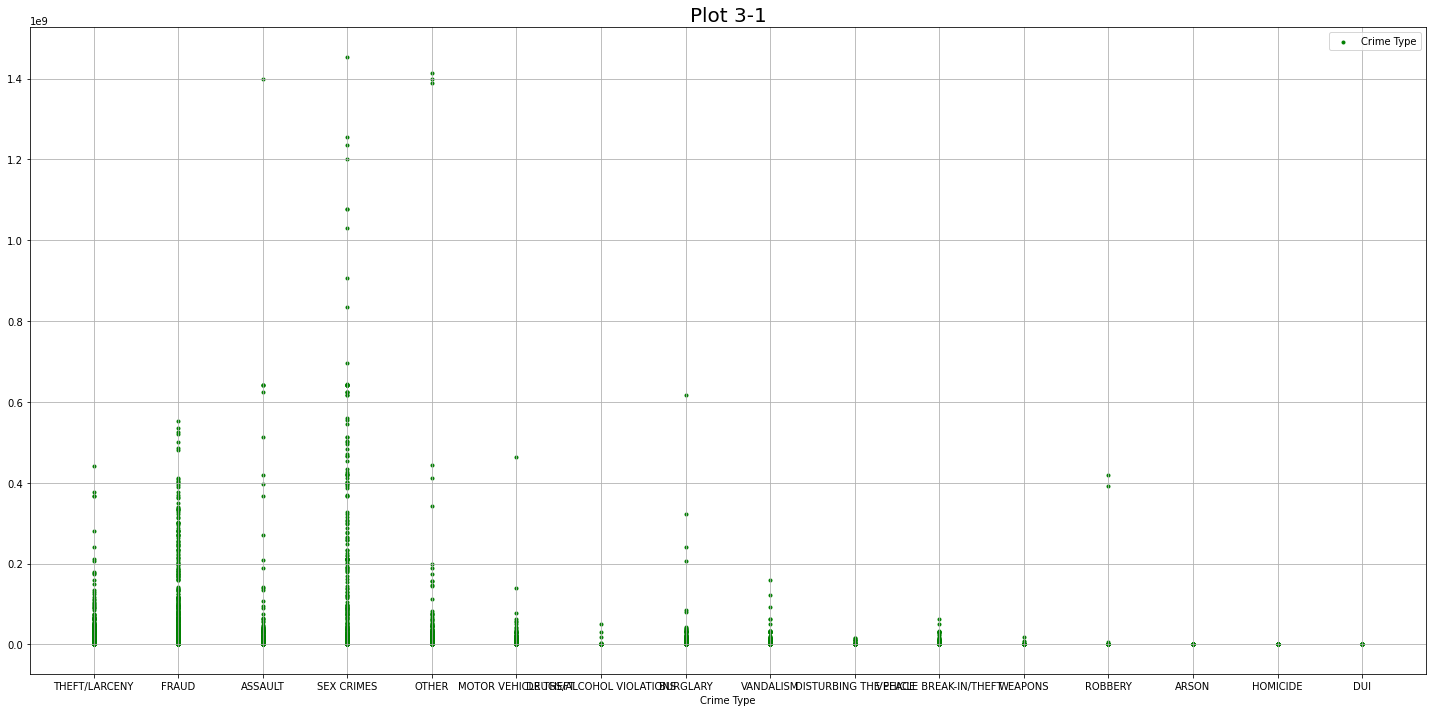

In [64]:
x = dataset_2014['CRIME_TYPE']

plt.scatter(x, latency, color = 'g', marker = '.',label = "Crime Type")
  
plt.xlabel('Crime Type')
plt.title('Plot 3-1', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

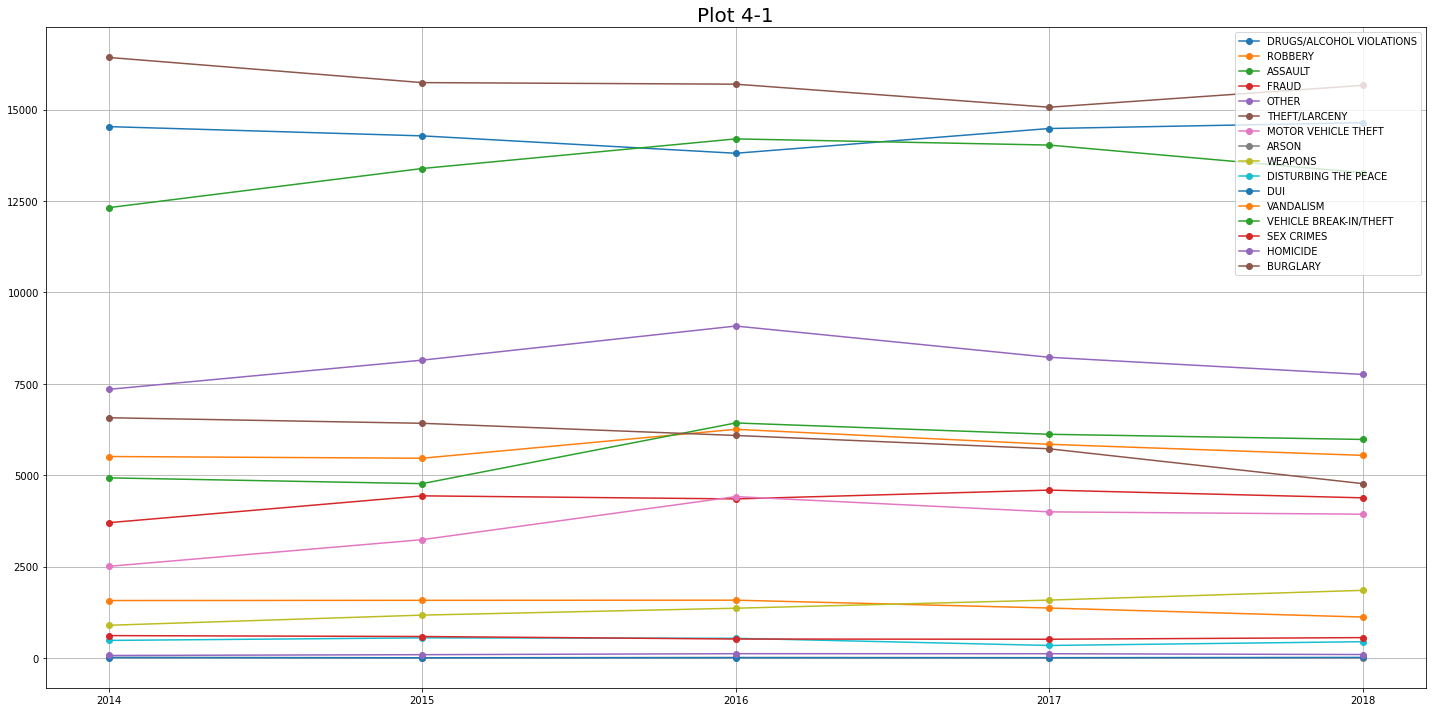

In [76]:
crimes_2014 = list(dataset_2014['CRIME_TYPE'])
crimes_2015 = list(dataset_2015['CRIME_TYPE'])
crimes_2016 = list(dataset_2016['CRIME_TYPE'])
crimes_2017 = list(dataset_2017['CRIME_TYPE'])
crimes_2018 = list(dataset_2018['CRIME_TYPE'])

years = ['2014', '2015', '2016', '2017', '2018']
for t in CRIME_TYPES:
    occ = [crimes_2014.count(t), crimes_2015.count(t), crimes_2016.count(t), crimes_2017.count(t), crimes_2018.count(t)]
    plt.plot(years, occ, marker = 'o',label = t)

plt.title('Plot 4-1', fontsize = 20)
plt.grid()
plt.legend()
plt.show()